In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise

In [3]:
data_dir = "./Trimmed Dataset/"

Total Images = 724
Number of Classes = 14


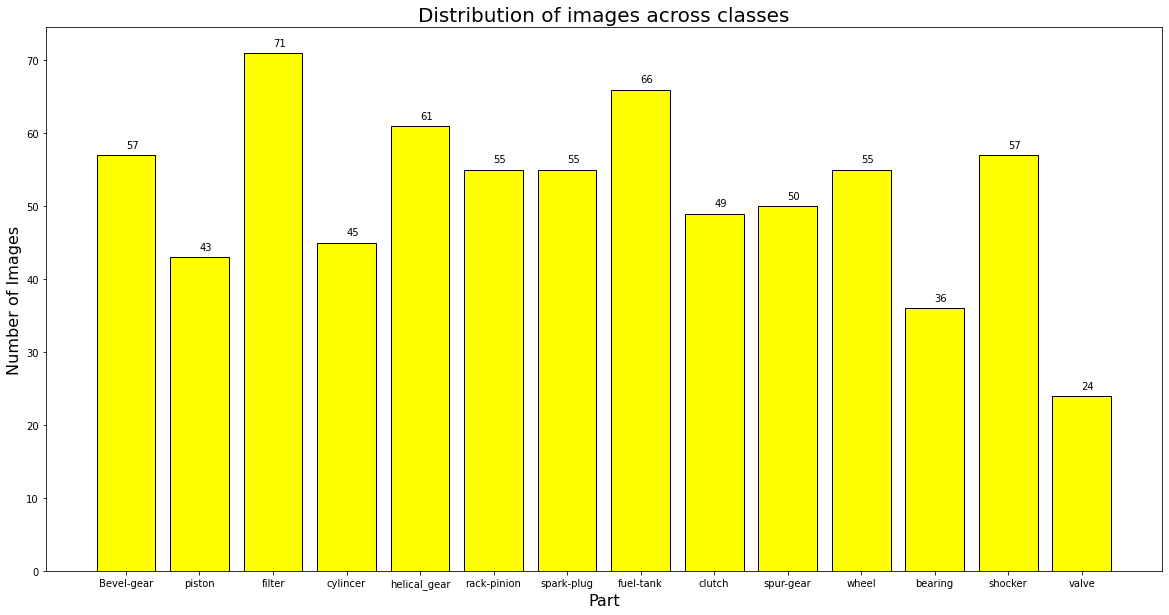

In [4]:
CLASSES = os.listdir(data_dir)
numImagesperClass = []
numImages = 0

for path in CLASSES:
    numImagesperClass.append(len(os.listdir(os.path.join(data_dir, path))))
    numImages += len(os.listdir(os.path.join(data_dir, path)))

print("Total Images = " + str(numImages))
print("Number of Classes = " + str(len(CLASSES)))

pos = np.arange(len(CLASSES))
plt.figure(figsize=(20,10))
plt.bar(pos, numImagesperClass, color="yellow", edgecolor="black")
plt.xticks(pos, CLASSES)
plt.xlabel('Part', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Distribution of images across classes',fontsize=20)

for i, v in enumerate(numImagesperClass):
    plt.text(i,v + 1, str(v))


plt.show()

In [5]:
def write_image(path, img):
    # img = img*(2**16-1)
    # img = img.astype(np.uint16)
    # img = img.astype(np.uint8)
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    cv2.imwrite(path, img)

In [7]:
classes = os.listdir(data_dir)

In [12]:
len(os.listdir("./TrimBalanced Dataset/Bevel-gear"))

1000

In [18]:
# for subdir, dirs, files in os.walk(data_dir):
    # print(dirs)
    # print(files)
    # for file in files:
    #     print(os.path.join(subdir, file))

new_data_dir = "./TrimBalanced Dataset/"

for Imclass in classes:

    cur_dir = os.path.join(new_data_dir, Imclass)
    images_paths = os.listdir(os.path.join(data_dir, Imclass))
    numImgInClass = len(os.listdir(cur_dir))

    print("Started operation for " + Imclass + " class" ,end=" ... ")
    ImagesPerClass = 1000
    
    while numImgInClass < ImagesPerClass:
        
        img_path = os.path.join(data_dir, Imclass, images_paths[(ImagesPerClass - numImgInClass) % len(images_paths)])
        img = cv2.imread(img_path)
        img = rotate(img, angle=random.randrange(5,95,5))
        transform = AffineTransform(translation=(random.randrange(-10,10,1)))
        img = warp(img,transform, mode="wrap")
        img = random_noise(img)
        img = cv2.GaussianBlur(img, (3,3),0)
        dir = cur_dir + "/image " + str(ImagesPerClass-numImgInClass) + ".jpg"
        write_image(dir, img)
        numImgInClass+=1
    print("Completed operation for " + Imclass + " class")

Started operation for Bevel-gear class ... Completed operation for Bevel-gear class
Started operation for piston class ... Completed operation for piston class
Started operation for filter class ... Completed operation for filter class
Started operation for cylincer class ... Completed operation for cylincer class
Started operation for helical_gear class ... Completed operation for helical_gear class
Started operation for rack-pinion class ... Completed operation for rack-pinion class
Started operation for spark-plug class ... Completed operation for spark-plug class
Started operation for fuel-tank class ... Completed operation for fuel-tank class
Started operation for clutch class ... 

KeyboardInterrupt: 

Total Images = 924
Number of Classes = 14


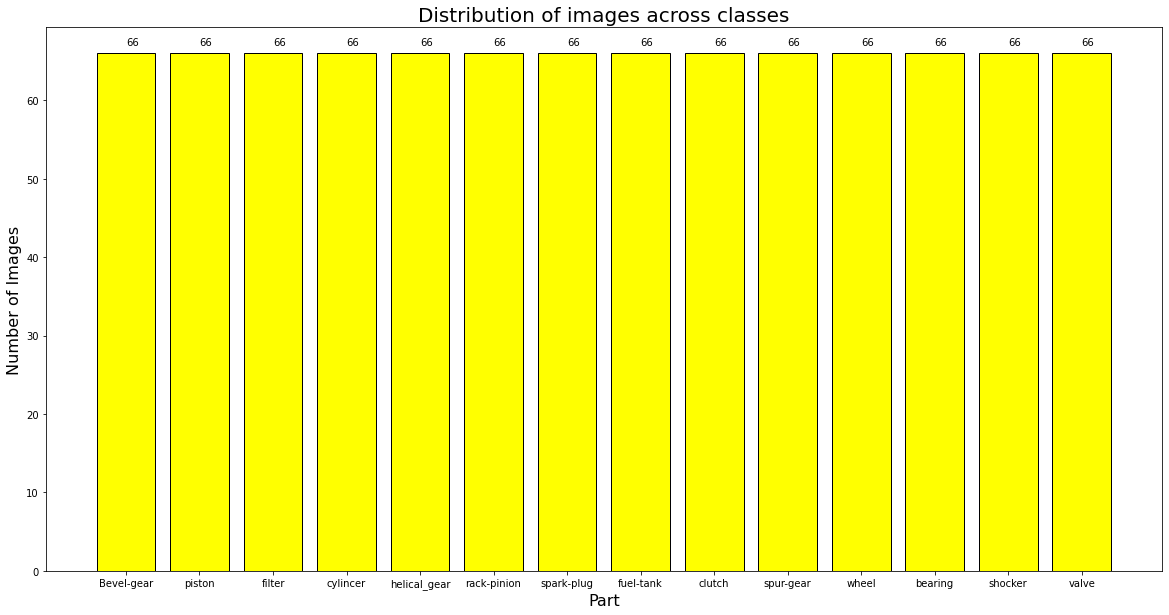

In [ ]:
data_dir = "./Automobile-parts_Balanced_Trimmed/"
CLASSES = os.listdir(data_dir)
numImagesperClass = []
numImages = 0

for path in CLASSES:
    numImagesperClass.append(len(os.listdir(os.path.join(data_dir, path))))
    numImages += len(os.listdir(os.path.join(data_dir, path)))

print("Total Images = " + str(numImages))
print("Number of Classes = " + str(len(CLASSES)))

pos = np.arange(len(CLASSES))
plt.figure(figsize=(20,10))
plt.bar(pos, numImagesperClass, color="yellow", edgecolor="black")
plt.xticks(pos, CLASSES)
plt.xlabel('Part', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Distribution of images across classes',fontsize=20)

for i, v in enumerate(numImagesperClass):
    plt.text(i,v + 1, str(v))


plt.show()